# Beer tasting visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS

# Generate test data

In [38]:
n_ppl = 12
ppl = ['person_%s' % i for i in range(n_ppl)]
n_beers = 7
beers = ['beer_%s' % i for i in range(n_beers)]

# Randomly assign rankings
np.random.seed(123)
data = np.array([np.random.permutation(range(n_beers)) for _ in range(n_ppl)])

df = pd.DataFrame(data, ppl, beers)
df.head()

,beer_0,beer_1,beer_2,beer_3,beer_4,beer_5,beer_6
person_0,1,3,4,0,2,5,6
person_1,4,0,6,5,2,3,1
person_2,3,5,4,2,6,0,1
person_3,5,4,2,3,1,0,6
person_4,3,2,1,6,5,0,4


# Load real data

In [3]:
beers = ['bells', 'laguanitas', 'goose', 'stone', 'torpedo', 'harpoon', 'dogfish', 'rebel']
beer_enum = {'beer_%d' % (i + 1): b for i, b in enumerate(beers)}
df = pd.read_csv('beer_data.csv', index_col=0).rename(columns=beer_enum)

df.head()

,bells,laguanitas,goose,stone,torpedo,harpoon,dogfish,rebel
person,,,,,,,,
Michael,2.5,2.50,2.6,2.75,2.5,2.60,2.5,2.80
Max,1.0,1.50,1.0,2.00,1.0,1.50,3.0,2.50
Trevor,2.5,2.75,3.0,3.25,3.0,2.75,3.5,3.25
Brigid,1.5,1.00,2.5,3.00,2.0,2.50,3.5,3.25
Shelby,2.0,2.50,2.7,3.00,2.8,2.80,3.5,2.60


# Visualize

In [4]:
"""Melt data"""
melted = df.rename_axis(index='person', columns='beer').stack().reset_index(name='ranking')

"""Aesthetis"""
beer_pal = dict(zip(melted.beer.unique(), sns.color_palette()))
person_pal = dict(zip(melted.person.unique(), sns.color_palette('Set2')))
melted.head()

,person,beer,ranking
0,Michael,bells,2.50
1,Michael,laguanitas,2.50
2,Michael,goose,2.60
3,Michael,stone,2.75
4,Michael,torpedo,2.50


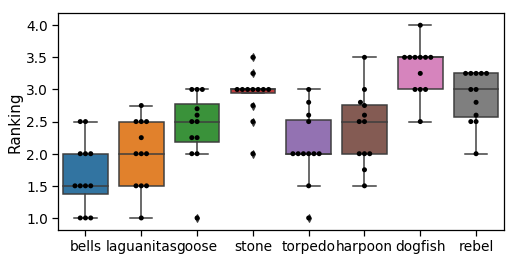

In [5]:
"""Distribution of rankings per beer"""
args = 'beer', 'ranking'
kwargs = dict(data=melted)
with sns.plotting_context('notebook', font_scale=1.25):
    plt.figure(figsize=(8, 4))
    sns.boxplot(*args, **kwargs, palette=beer_pal)
    sns.swarmplot(*args, **kwargs, color='k')
    plt.xlabel('')
    plt.ylabel('Ranking')
plt.show()

In [36]:
melted.groupby('beer').ranking.mean().sort_values()

beer
bells         1.666667
laguanitas    2.000000
torpedo       2.116667
goose         2.400000
harpoon       2.408333
rebel         2.887500
stone         2.916667
dogfish       3.312500
Name: ranking, dtype: float64

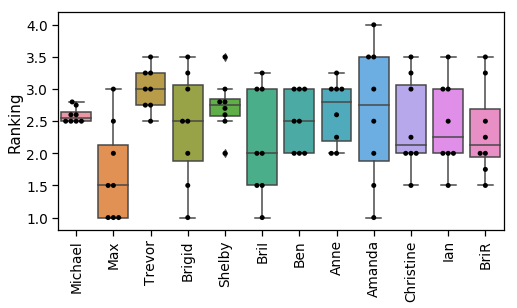

In [6]:
"""Distribution of rankings per beer"""
args = 'person', 'ranking'
kwargs = dict(data=melted)
with sns.plotting_context('notebook', font_scale=1.25):
    plt.figure(figsize=(8, 4))
    sns.boxplot(*args, **kwargs)
    sns.swarmplot(*args, **kwargs, color='k')
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.ylabel('Ranking')
plt.show()

C:\Users\Michael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


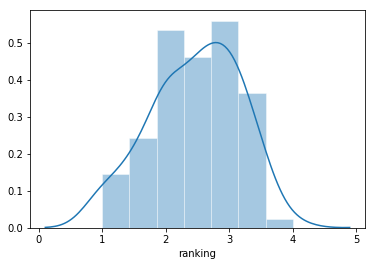

In [20]:
sns.distplot(melted.ranking, hist_kws={'ec': 'w'})
plt.show()

In [8]:
"""Cluster people"""
mds_data = MDS(random_state=123).fit_transform(df)
mds = pd.DataFrame(mds_data, df.index, columns=['c1', 'c2']).rename_axis('person').reset_index()
mds.head()

,person,c1,c2
0,Michael,1.372801,0.541949
1,Max,-2.093788,1.284392
2,Trevor,1.669015,-0.437920
3,Brigid,-0.824279,-0.282909
4,Shelby,0.963646,-0.588060


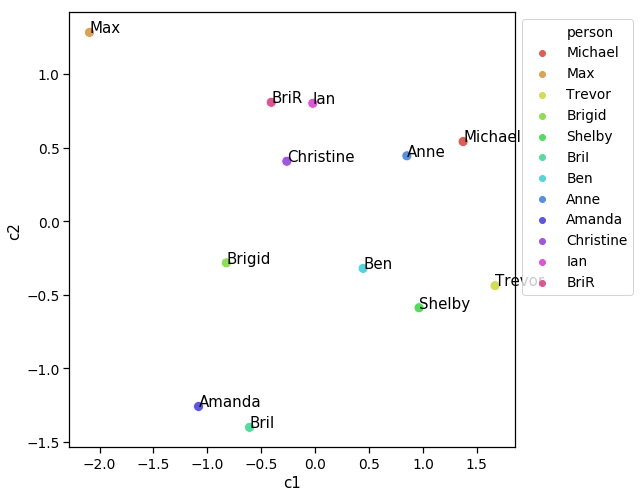

In [9]:
with sns.plotting_context('notebook', font_scale=1.25):
    plt.figure(figsize=(8, 8))
    sns.scatterplot('c1', 'c2', 'person', data=mds, s=100, palette='hls')
    for person in mds.person.unique():
        d = mds[mds.person.eq(person)].squeeze()
        person, c1, c2 = d[['person', 'c1', 'c2']]
        plt.annotate(person, (c1, c2))
    plt.legend(bbox_to_anchor=(1, 1))
plt.show()